In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
**battery_power** Total energy a battery can store in one time measured in mAh <br>
**blue** Has bluetooth or not <br>
**clock_speed** speed at which microprocessor executes instructions <br>
**dual_sim** Has dual sim support or not <br>
**fc**  Front Camera mega pixels <br>
**four_g** Has 4G or not <br>
**int_memory** Internal Memory in Gigabytes <br>
**m_dep** Mobile Depth in cm <br>
**mobile_wt** Weight of mobile phone <br>
**n_cores** Number of cores of processor <br>
**pc** Primary Camera mega pixels <br>
**px_height** Pixel Resolution Height <br>
**px_width** Pixel Resolution Width <br>
**ram** Random Access Memory in Megabytes <br>
**sc_h** Screen Height of mobile in cm <br>
**sc_w** Screen Width of mobile in cm <br>
**talk_time** longest time that a single battery charge will last when you are <br>
**three_g** Has 3G or not <br>
**touch_screen** Has touch screen or not <br>
**wifi** Has wifi or not <br>

### Variable type 
The majority of the variables are either Guassian or Binonminal. There is one variable that is multinonminal (n_cores), which we will remove from the data set. We will test to see which Naive Bayes distribution (Guassian vs. Binonminal) is better for picking the target variable of this data set (price_range). 


In [104]:
train_df = pd.read_csv('train.csv').drop("n_cores",axis=1)
test_df = pd.read_csv('test.csv').drop("n_cores",axis=1)

In [57]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,1208,1212,1411,8,2,15,1,1,0,1


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 312.6 KB


In [60]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [61]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

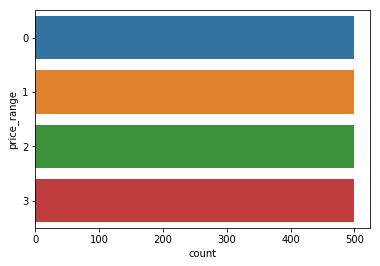

In [62]:
#check to see if data set is balanced by getting unique counts of target variable - which it is 
sns.countplot(y="price_range",data=train_df)
#plt.show()

In [63]:
# unique value counts of each variable to help with classifiying variable type - binonmial, multinomial or guassian 
unique_counts = train_df.nunique()
unique_counts

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Using Binonmial Variables to predict pricing range

In [65]:
# Create dataframe that consist of binonmial variables (unique count = 2)
b_variables = list(unique_counts[unique_counts==2].index[:])
b_variables.append("price_range")
bernoulli_df = train_df[b_variables].copy()
bernoulli_df

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
5,0,1,0,1,0,0,1
6,0,0,1,1,0,1,3
7,0,1,0,1,1,1,0
8,1,0,0,1,0,0,0
9,1,1,1,1,0,0,0


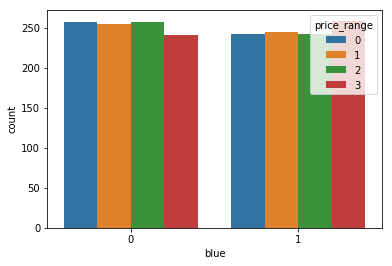

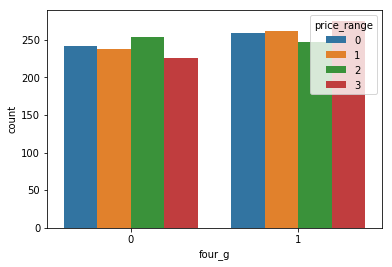

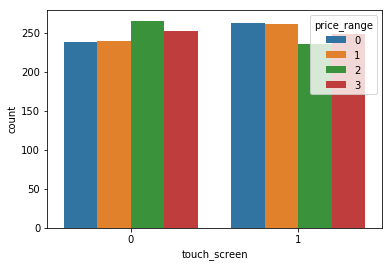

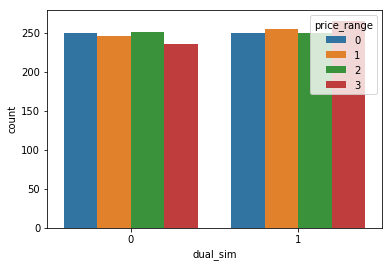

In [71]:
# exploring the dataset 
sns.countplot(x="blue",hue="price_range",data=bernoulli_df)
plt.show()
sns.countplot(x="four_g",hue="price_range",data=bernoulli_df)
plt.show()
sns.countplot(x="touch_screen",hue="price_range",data=bernoulli_df)
plt.show()
sns.countplot(x="dual_sim",hue="price_range",data=bernoulli_df)
plt.show()

                  blue  dual_sim    four_g   three_g  touch_screen      wifi  \
blue          1.000000  0.035198  0.013443 -0.030236      0.010061 -0.021863   
dual_sim      0.035198  1.000000  0.003187 -0.014008     -0.017117  0.022740   
four_g        0.013443  0.003187  1.000000  0.584246      0.016758 -0.017620   
three_g      -0.030236 -0.014008  0.584246  1.000000      0.013917  0.004316   
touch_screen  0.010061 -0.017117  0.016758  0.013917      1.000000  0.011917   
wifi         -0.021863  0.022740 -0.017620  0.004316      0.011917  1.000000   
price_range   0.020573  0.017444  0.014772  0.023611     -0.030411  0.018785   

              price_range  
blue             0.020573  
dual_sim         0.017444  
four_g           0.014772  
three_g          0.023611  
touch_screen    -0.030411  
wifi             0.018785  
price_range      1.000000  


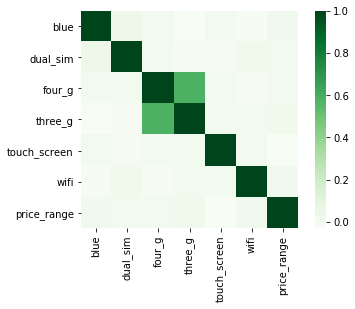

In [72]:
# see correlation of variables 
## four_g and three_g columns have a correlation between .3 and .7
corrmat = bernoulli_df.corr()
print(corrmat)
sns.heatmap(corrmat,square=True,cmap="Greens")

In [73]:
# since there are only two variables that have any correlation, we will use all variables 

In [97]:
X=bernoulli_df.copy().drop('price_range',axis=1)
y=bernoulli_df['price_range'].copy()

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [99]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [100]:
bnb.score(X_test,y_test)

0.22121212121212122

# Using Guassian to predict target variable 

In [66]:
g_variables = list(unique_counts[unique_counts!=2].index[:])
guassian_df = train_df[g_variables].copy()
guassian_df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15,1
5,1859,0.5,3,22,0.7,164,7,1004,1654,1067,17,1,10,1
6,1821,1.7,4,10,0.8,139,10,381,1018,3220,13,8,18,3
7,1954,0.5,0,24,0.8,187,0,512,1149,700,16,3,5,0
8,1445,0.5,0,53,0.7,174,14,386,836,1099,17,1,20,0
9,509,0.6,2,9,0.1,93,15,1137,1224,513,19,10,12,0


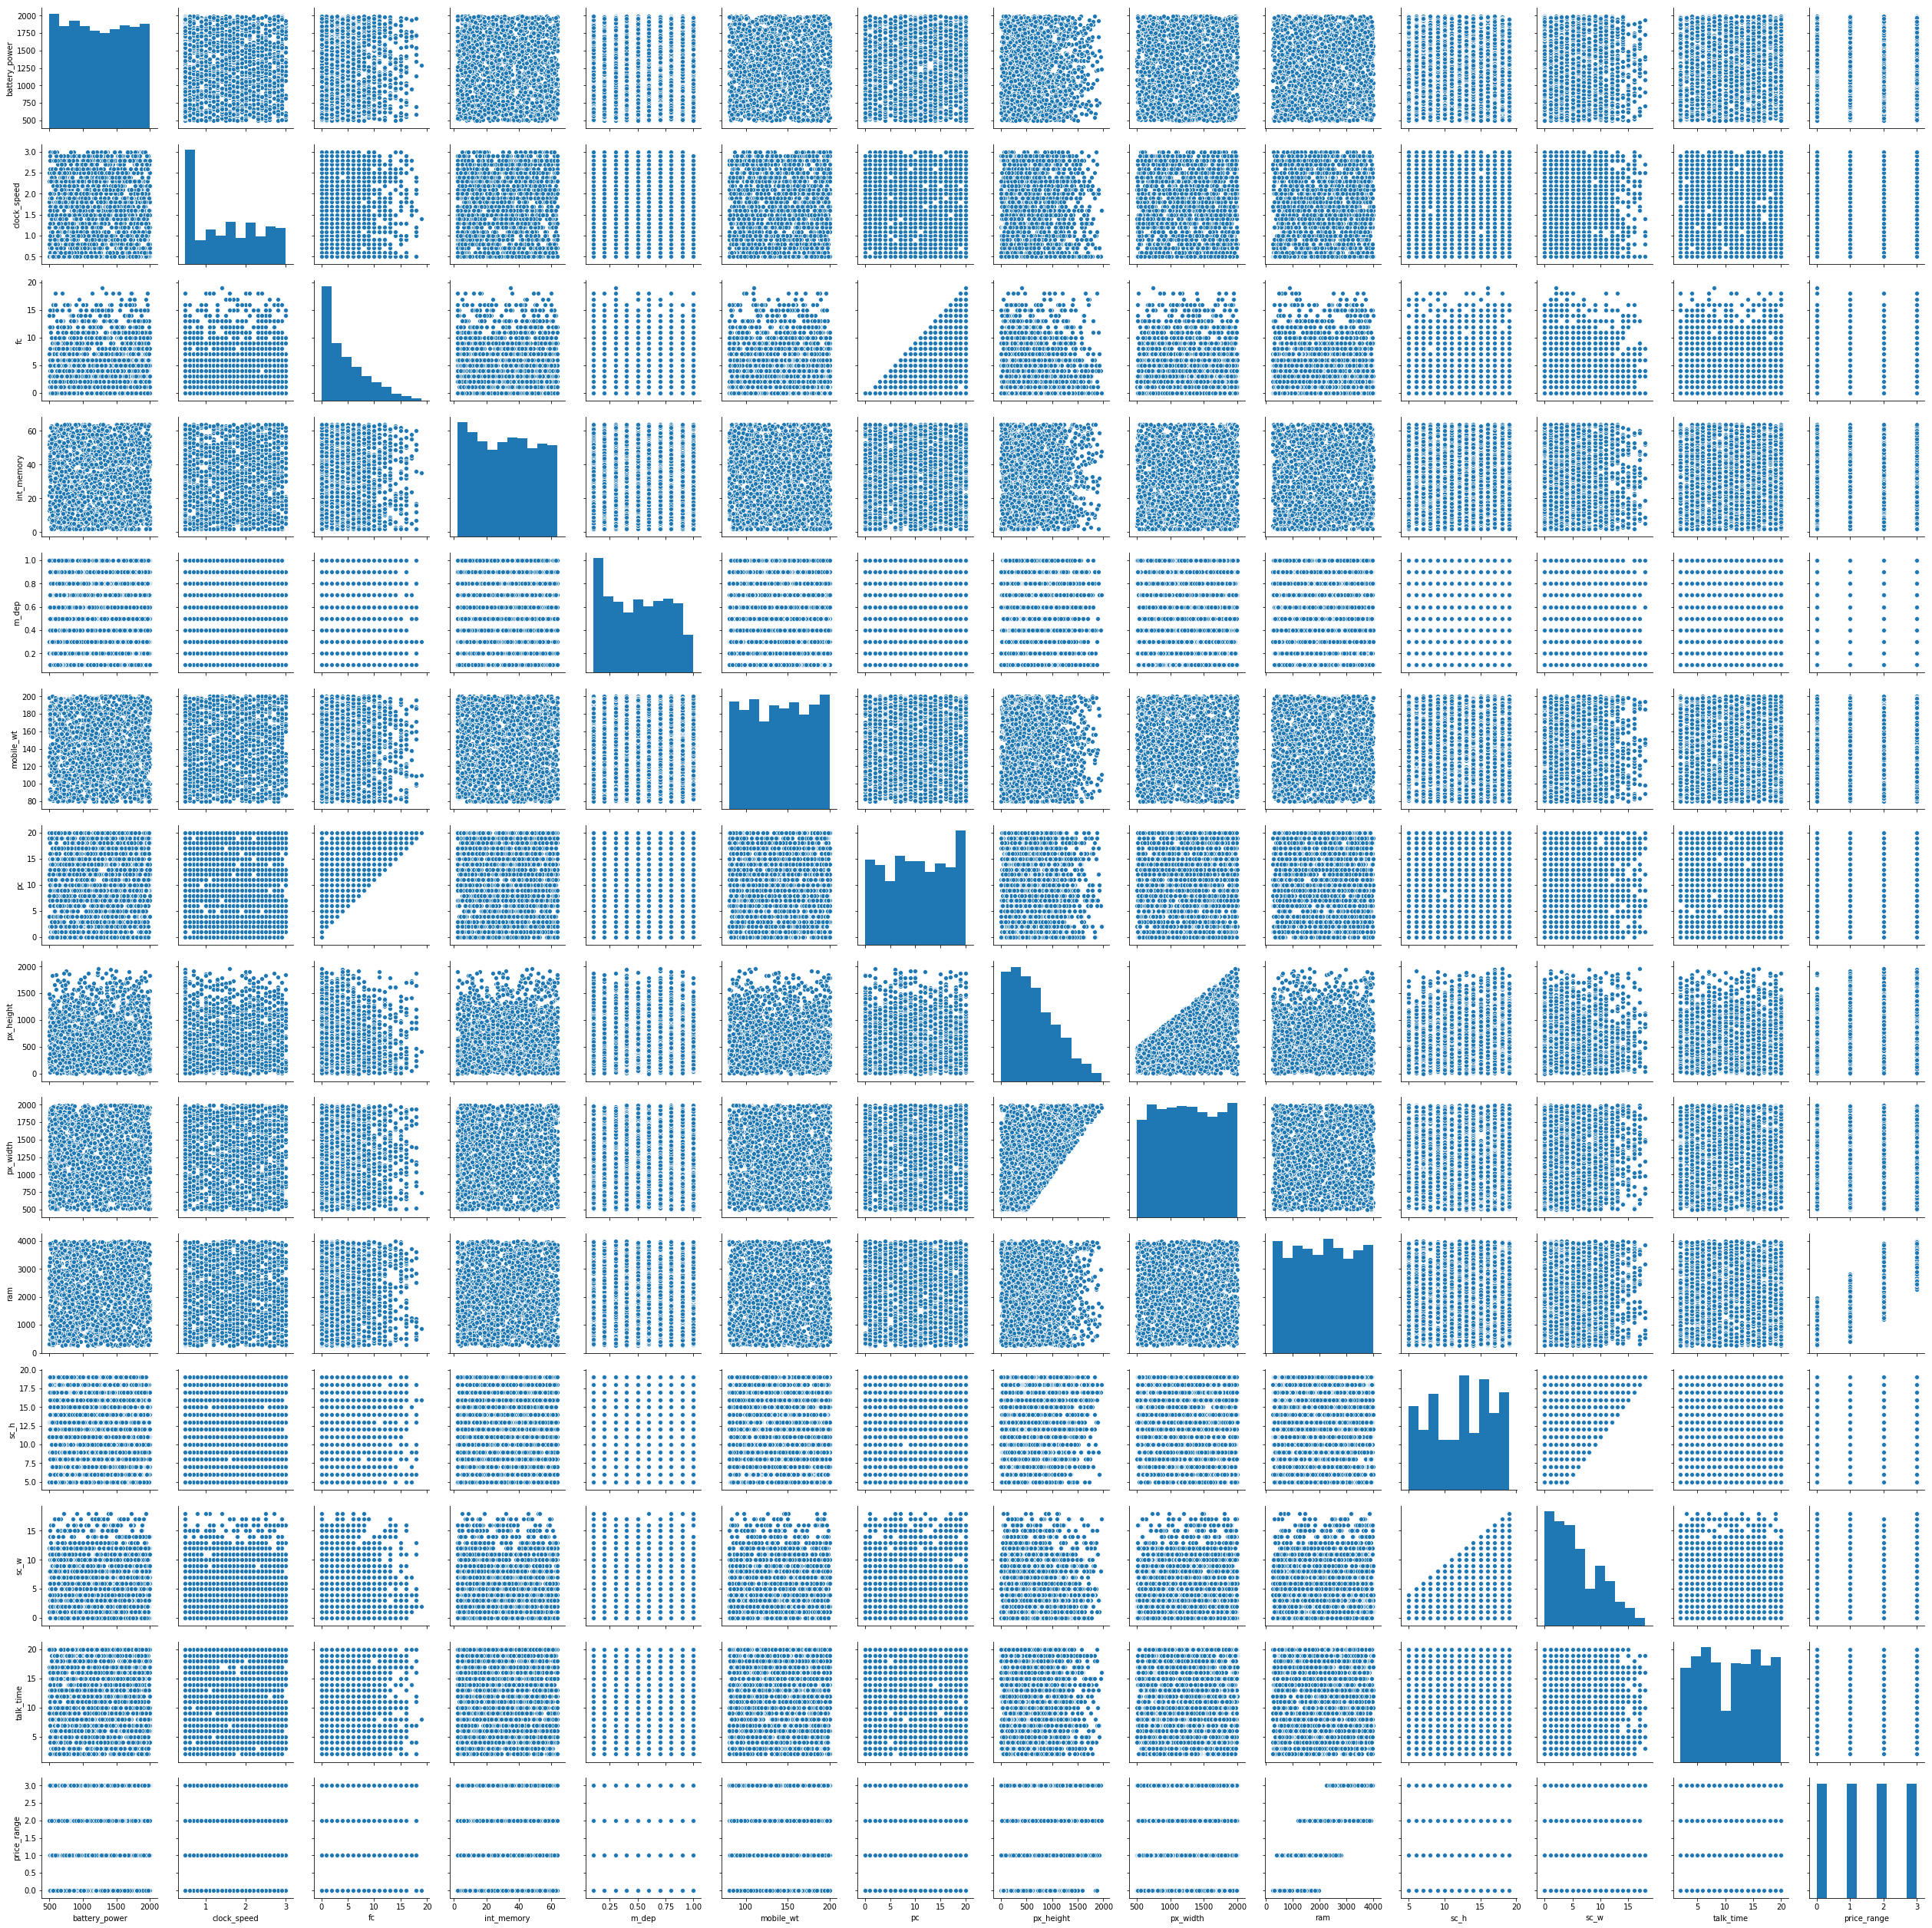

In [83]:
#quick view to see if there are any correlating variables 
sns.pairplot(guassian_df)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818
ram,-0.000653,0.003443,0.015099,0.032813,-0.009434,-0.002581,0.028984,-0.020352,0.004105,1.000000,0.015996,0.035576,0.010820,0.917046


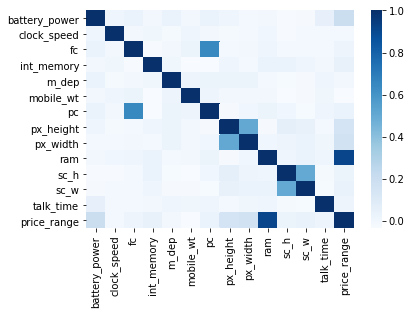

In [108]:
corrmat = guassian_df.corr()
sns.heatmap(corrmat,cmap="Blues")
corrmat

In [101]:
X=guassian_df.copy().drop('price_range',axis=1)
y=guassian_df['price_range'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [102]:
gnb.score(X_test,y_test)

0.806060606060606

In [107]:
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,20,52,1009,651,6,0,5,1,0,1
